### Instructions
The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

### 1 - Import Libraries and Data
The data is an array defined below.  The duration is measured in seconds, and loudness is in loudness units (not decibels, as this isn't linear).  The target variable is 'jazz', indicating if the corresponding datapoint is a jazz or rock song, where a 1 indicates a jazz song and a 0 indicates a rock song.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [30]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


### 2 - A Glance at the Data
Below is a plot of the loudness and duration, where the blue dots indicate rock songs and the orange dots indicate jazz songs.  Visually, the biggest indicator of the genre of the song is the loudness of the song, with the boundary at around a loudness of 23.

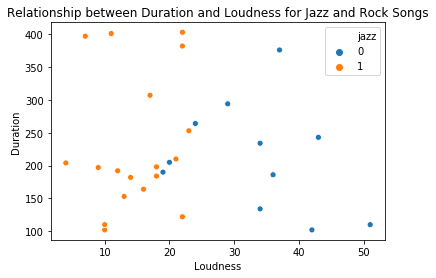

In [47]:
sns.scatterplot(x = 'loudness', y = 'duration', hue = 'jazz', data = music)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Relationship between Duration and Loudness for Jazz and Rock Songs')

### 3 - Writing a Nearest Neighbor Algorithm
The nearest neighbor algorithm takes in a data point and finds the nearest data point in the dataset.  The input data point will have the same classification as the one in the dataset.  The euclidean distance will be used to find the nearest data point.  Since this is a 2D array, I can use Pythagorean theorem.

In [64]:
dataset_lst = list(zip(music['loudness'], music['duration']))

In [92]:
def nn(datapt):
    min_index = np.argmin([euclidean(datapt, dataset_lst[i]) for i in range(len(dataset_lst))])
    genre =  music['jazz'][min_index]
    if genre == 0:
        return 'rock'
    else: 
        return 'jazz'

def euclidean(datapt1, datapt2):
    return np.sqrt((datapt1[0] - datapt2[0])**2 + (datapt1[0] - datapt2[0])**2)

Here are a few predictions:

In [112]:
print('The model predicts that at 24 loudness and 190 seconds, the song is {}'.format(nn([24,190])))
print('The model predicts that at 44 loudness and 150 seconds, the song is {}'.format(nn([44,150])))
print('The model predicts that at 10 loudness and 120 seconds, the song is {}'.format(nn([10,120])))
print('The model predicts that at 32 loudness and 122 seconds, the song is {}'.format(nn([33,120])))

The model predicts that at 24 loudness and 190 seconds, the song is rock
The model predicts that at 44 loudness and 150 seconds, the song is rock
The model predicts that at 10 loudness and 120 seconds, the song is jazz
The model predicts that at 32 loudness and 122 seconds, the song is rock


Using sklearn's KNeighborsClassifier, I can check the above predictions to make sure the algorithm I wrote is predicting correctly.

In [111]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [108]:
def print_genre(model):
    genre = None
    if model[0] == 0:
        genre = 'rock'
    else:
        genre = "jazz"
    print('The model predicts that at 24 loudness and 190 seconds, the song is {}'.format(genre))

In [113]:
print_genre(neighbors.predict([[24, 190]]))
print_genre(neighbors.predict([[44, 150]]))
print_genre(neighbors.predict([[10, 120]]))
print_genre(neighbors.predict([[33, 120]]))

The model predicts that at 24 loudness and 190 seconds, the song is rock
The model predicts that at 24 loudness and 190 seconds, the song is rock
The model predicts that at 24 loudness and 190 seconds, the song is jazz
The model predicts that at 24 loudness and 190 seconds, the song is jazz


As you can see, the two algorithms match.